In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [149]:
df = pd.read_csv("Disease.csv")

In [150]:
df

,Disease,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [151]:
df.shape

(81, 4)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Disease    81 non-null object
Age        81 non-null int64
Number     81 non-null int64
Start      81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [153]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [154]:
df['Disease'].unique()

array(['absent', 'present'], dtype=object)

In [155]:
df = df.replace("present",1).replace("absent",0)

In [156]:
df

,Disease,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [157]:
df.Age.unique()

array([ 71, 158, 128,   2,   1,  61,  37, 113,  59,  82, 148,  18, 168,
        78, 175,  80,  27,  22, 105,  96, 131,  15,   9,   8, 100,   4,
       151,  31, 125, 130, 112, 140,  93,  52,  20,  91,  73,  35, 143,
        97, 139, 136, 121, 177,  68,  72, 120,  51, 102, 114,  81, 118,
        17, 195, 159, 127,  87, 206,  11, 178, 157,  26,  42,  36],
      dtype=int64)

Maximun of people cannot  live more than 115 age and above that is outlier has per (Jeanne Calment, they concluded, was a statistical outlier.)

In [158]:
df[df['Age'] > 115].count()

Disease    30
Age        30
Number     30
Start      30
dtype: int64

In [159]:
df['Age'].mean()

83.65432098765432

In [160]:
df['Age'].median()

87.0

In [161]:
#replace it by mean
df.loc[df['Age'] > 115, 'Age'] = 82

In [162]:
df[df['Age'] > 115].count()

Disease    0
Age        0
Number     0
Start      0
dtype: int64

In [163]:
df.Disease.value_counts()

0    64
1    17
Name: Disease, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000267D5915A08>,
      dtype=object)

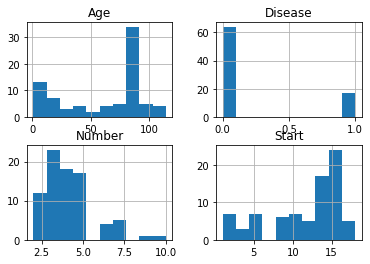

In [164]:
df.hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x267d5f1cd48>,
 'caps': [<matplotlib.lines.Line2D at 0x267d5f1ed08>,
 'boxes': [<matplotlib.lines.Line2D at 0x267d5f1c288>],
 'medians': [<matplotlib.lines.Line2D at 0x267d5f21c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x267d5f21d48>],
 'means': []}

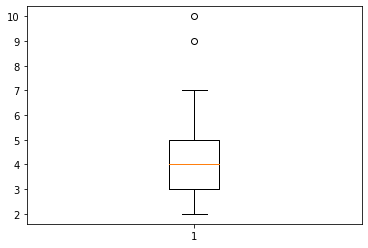

In [165]:
plt.boxplot(df['Number'])

{'whiskers': [<matplotlib.lines.Line2D at 0x267d5f85dc8>,
 'caps': [<matplotlib.lines.Line2D at 0x267d5f88d88>,
 'boxes': [<matplotlib.lines.Line2D at 0x267d5f85348>],
 'medians': [<matplotlib.lines.Line2D at 0x267d5f8fd08>],
 'fliers': [<matplotlib.lines.Line2D at 0x267d5f8fdc8>],
 'means': []}

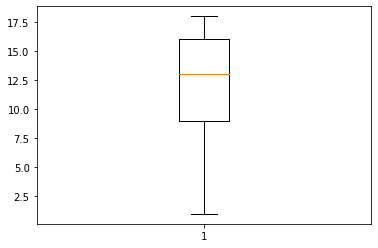

In [166]:
plt.boxplot(df['Start'])

In [167]:
#df[df['Number'] > 7]
df =df.drop(df[df.Number > 7].index)

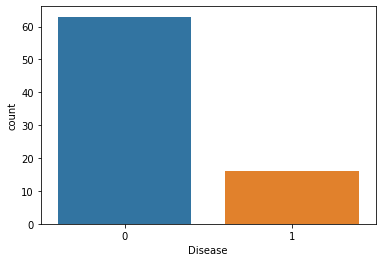

In [168]:
import seaborn as sns
sns.countplot(x = 'Disease', data =df)

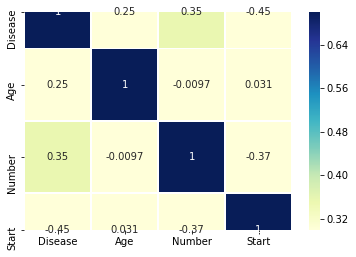

In [169]:
corr = df.corr()

sns.heatmap(corr, vmin=0.3,
    vmax=0.7,
    annot=True,
    linewidth = 0.7,cmap ="YlGnBu" )


In [170]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Disease')

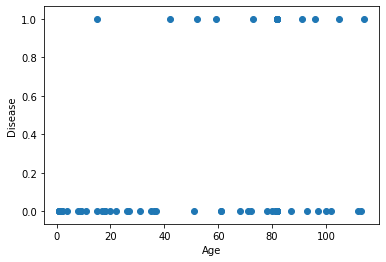

In [171]:
plt.scatter( x = 'Age', y = 'Disease', data = df)
plt.xlabel("Age")
plt.ylabel("Disease")

# Model Formation And Predicting

In [172]:
df.columns

Index(['Disease', 'Age', 'Number', 'Start'], dtype='object')

In [173]:
X = df[['Age', 'Number', 'Start']]

In [174]:
y= df['Disease']

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [176]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state =0 )

# Decision Tree algorithm

In [177]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [178]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [179]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
#Predict 
y_pred = clf.predict(X_test)

In [180]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred) 
  
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[15  5]
 [ 1  3]]


In [181]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.75


# improvise the model by LogisticRegression

In [182]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(multi_class='ovr',random_state = 0)

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [183]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7916666666666666


In [184]:
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred) 
  
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[17  3]
 [ 2  2]]


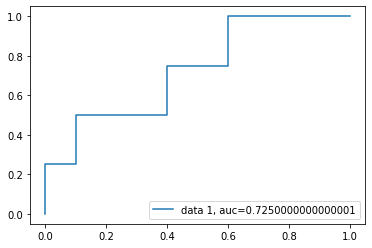

In [189]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [210]:
from sklearn.neighbors import KNeighborsClassifier

In [217]:
knn = KNeighborsClassifier(n_neighbors=8)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [221]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.875


In [220]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.95      0.93        20
           1       0.67      0.50      0.57         4

    accuracy                           0.88        24
   macro avg       0.79      0.72      0.75        24
weighted avg       0.87      0.88      0.87        24



In [226]:
error = []

# Calculating error 
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

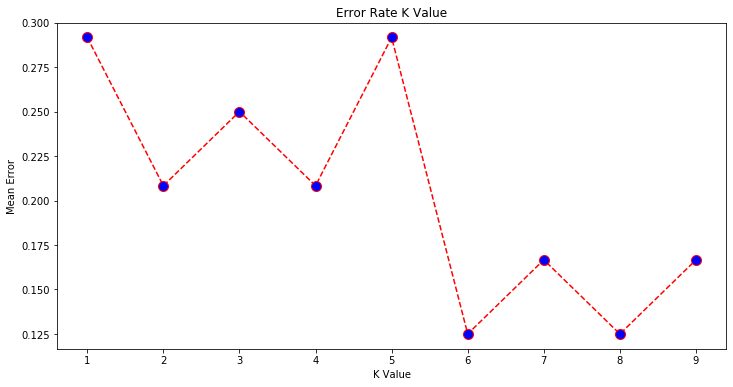

In [227]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')